    Implementing a Machine Learning Pipeline
* Regression analysis is simplified by the formula:
    $y_i = f(x, \beta) + e_i$ where $y_i$ is the output of the model, f is the mapping function, x are our features, $\beta$ represents unknown parameters such as the weights of the model and $e_i$ represents the error terms in the analysis. 
* In Python(and other languages by extension), regression can be performed using both parametric and non-parametric models.
* Parametric models: Assume that there is a mapping function that can be applied to the data to yield the continuous output results. Examples include linear models such as Linear regression, Lasso regression, simple neural networks, Naive Bayes etc. 
* Non-parametric models: Do not make strong assumptions regarding the mapping of the function. Examples include decision tree models, ensemble models and gradient boosting models. 


In [24]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [7]:
df = pd.read_csv('crypto_currency.csv')
df.head(2)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,713198620.0,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,400475518.0,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267


In [8]:
df.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,12632.0,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,1.0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,...,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,0.0,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,...,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,1.0,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,...,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,1.0,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,...,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,1.0,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,...,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,1.0,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.500000,893.000000,50.000000,328.000000,...,970.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5178.000000,1.867715,3.788975e+11,13066.731701
max,1.0,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.000000,...,1490.000000,10.000000,2.000000,2.000000,12.000000,178.000000,140431.000000,34.932303,2.062215e+12,61259.670876


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [11]:
len(df)

12632

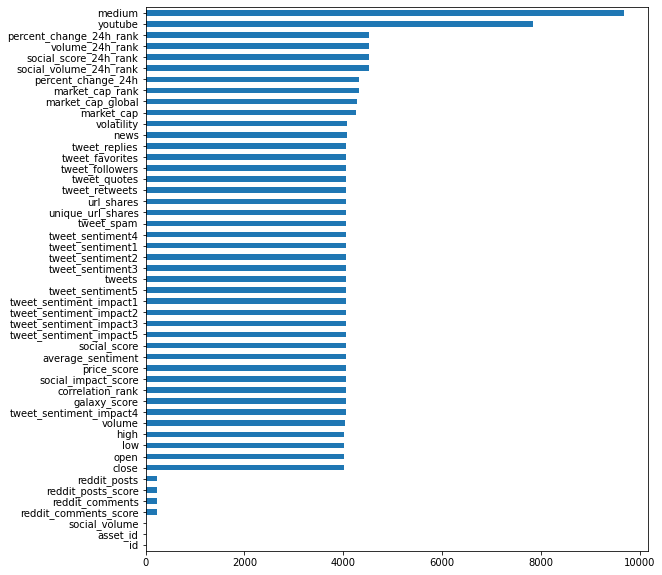

In [10]:
#missing values
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))

In [13]:
df['social_score_24h_rank'].unique()

array([ 1., nan,  2.])

In [16]:
#simple for loop to distinguish continous variables from categorical variables
cat_cols = list()
num_cols = list()
for col in df.columns:
    if df[col].nunique() < 10: #wide guess
        cat_cols.append(col)
    else:
        num_cols.append(col)
cat_cols

['asset_id',
 'market_cap_rank',
 'volume_24h_rank',
 'social_volume_24h_rank',
 'social_score_24h_rank']

In [21]:
#using frequency encoders to handle the categorical columns
def frequency_encoding(df, col):
    fe = df.groupby(col).size()/len(df)
    df[col+"_encoded"] = df[col].map(fe)
    return df
new_train = frequency_encoding(df, 'asset_id')
new_train = frequency_encoding(new_train, 'market_cap_rank')
new_train = frequency_encoding(new_train, 'social_volume_24h_rank')
new_train = frequency_encoding(new_train, 'social_score_24h_rank')

In [18]:
#performing interpolation for other missing data
new_train = new_train.drop(columns=['medium', 'youtube'], axis=1)
train_data = new_train.interpolate(method ='linear', limit_direction ='forward')
train_data.head(2)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close,asset_id_encoded,market_cap_rank_encoded,social_volume_24h_rank_encoded,social_score_24h_rank_encoded
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,713198620.0,1.737635e+11,1689.0,817.0,55.0,...,1.0,1.0,4422,1.434516,2.818066e+11,9428.279323,1.0,0.657774,0.62975,0.637983
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,400475518.0,1.426942e+11,920.0,544.0,20.0,...,1.0,1.0,2159,-2.459507,2.126897e+11,7967.567267,1.0,0.657774,0.62975,0.637983


<AxesSubplot:>

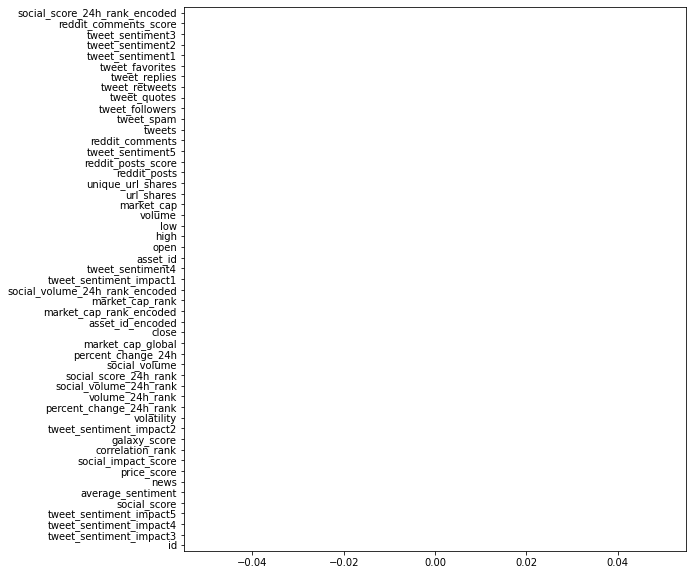

In [19]:
train_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))

In [22]:
train_data = train_data.drop(columns=['id'], axis=1)
X_new = train_data.drop(columns = ['close'], axis=1)
y_new = train_data['close']

In [25]:
SEED = 2021
#Models Comparison
models = []
models.append(('Linear_Regression', LinearRegression()))
models.append(("Random_Forest", RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results = -(cross_val_score(model, X_new, y_new, cv=kfold, scoring=scoring))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Linear_Regression: 4915.899332 (3361.335557)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random_Forest: 5009.958603 (1028.037539)


In [26]:
X_train, X_test, y_train,y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:5]

array([11774.2780645 ,  7095.20124946,  6258.99778523, 54278.58706356,
        9551.03126496])

Try further preprocessing like:
* Scaling numerical attributes. 
* Normalizing numeric attributes.
* Clustering(for those familiar with clustering)